In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
import keras

In [79]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [81]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Colab Notebooks/train'
valid_path = '/content/drive/My Drive/Colab Notebooks/test1'

In [82]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [83]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [84]:
# useful for getting number of output classes
folders = glob('/content/drive/My Drive/Colab Notebooks/train/*')

In [85]:
folders

['/content/drive/My Drive/Colab Notebooks/train/category 4',
 '/content/drive/My Drive/Colab Notebooks/train/category 2',
 '/content/drive/My Drive/Colab Notebooks/train/category 1',
 '/content/drive/My Drive/Colab Notebooks/train/category 3']

In [86]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [87]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [88]:

# view the structure of the model
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [89]:

from tensorflow.keras.layers import MaxPooling2D

In [90]:
## Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(4,activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 50176)            

In [91]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [92]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [93]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 440 images belonging to 4 classes.


In [94]:
training_set


In [95]:

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/test1',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 30 images belonging to 4 classes.


In [96]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
14/14 [==============================] - 41s 3s/step - loss: 3.9343 - accuracy: 0.4114 - val_loss: 1.8242 - val_accuracy: 0.5333
Epoch 2/20
14/14 [==============================] - 23s 2s/step - loss: 0.8924 - accuracy: 0.6523 - val_loss: 2.8112 - val_accuracy: 0.1667
Epoch 3/20
14/14 [==============================] - 22s 2s/step - loss: 0.4111 - accuracy: 0.8705 - val_loss: 6.3948 - val_accuracy: 0.1667
Epoch 4/20
14/14 [==============================] - 23s 2s/step - loss: 0.2690 - accuracy: 0.8841 - val_loss: 7.8861 - val_accuracy: 0.1667
Epoch 5/20
14/14 [==============================] - 22s 2s/step - loss: 0.1960 - accuracy: 0.9364 - val_loss: 8.8078 - val_accuracy: 0.1667
Epoch 6/20
14/14 [==============================] - 22s 2s/step - loss: 0.1516 - accuracy: 0.9500 - val_loss: 8.6064 - val_accuracy: 0.1667
Epoch 7/20
14/14 [==============================] - 22s 2s/step - loss: 0.1273 - accuracy: 0.9477 - val_loss: 9.2869 - val_accuracy: 0.1667
Epoch 8/20
14/14 [==

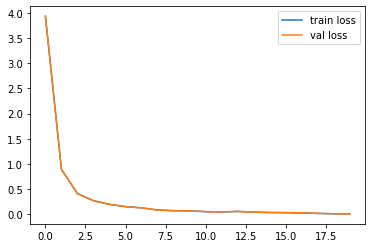

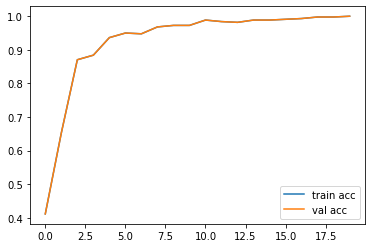

<Figure size 432x288 with 0 Axes>

In [97]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [98]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h6')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model_vgg19.h6/assets


In [99]:

y_pred = model.predict(test_set)

In [100]:
y_pred

array([[7.56452607e-07, 1.93138112e-05, 9.99978542e-01, 1.43900650e-06],
       [5.19690647e-23, 1.00000000e+00, 1.04684198e-12, 5.67899194e-09],
       [1.34282742e-14, 1.90812170e-05, 7.95328603e-08, 9.99980807e-01],
       [2.05614857e-19, 9.99999881e-01, 1.29942279e-09, 9.55230206e-08],
       [9.99953151e-01, 4.50553796e-11, 4.68307117e-05, 4.22592433e-10],
       [2.39735369e-13, 2.25082908e-06, 1.07626185e-07, 9.99997616e-01],
       [2.39735369e-13, 2.25082908e-06, 1.07626185e-07, 9.99997616e-01],
       [1.32592470e-06, 5.83595806e-07, 9.99997139e-01, 9.18151272e-07],
       [7.77476040e-26, 1.00000000e+00, 2.44732433e-14, 6.69178385e-12],
       [1.80415239e-03, 1.41310565e-07, 9.98194158e-01, 1.53092969e-06],
       [3.58828947e-05, 1.56614460e-05, 9.99947190e-01, 1.32847833e-06],
       [3.65112633e-08, 3.48134705e-07, 9.99999642e-01, 7.82325849e-09],
       [9.47785036e-13, 1.54825523e-06, 5.71216219e-07, 9.99997854e-01],
       [3.60231944e-23, 1.00000000e+00, 2.60593467e

In [101]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [102]:
y_pred


array([2, 1, 3, 1, 0, 3, 3, 2, 1, 2, 2, 2, 3, 1, 2, 2, 0, 0, 2, 1, 0, 0,
       2, 1, 1, 1, 2, 3, 2, 1])

In [103]:

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [104]:
model=load_model('model_vgg19.h6')